In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = "/Users/jishnu/codespace/AMATEUR_RADIO/Code_nanovna/CABLE_DATA/"
file_name_load = "lc_load_S11.s1p"
file_name_open = "lc_open_S11.s1p"
file_name_short = "lc_short_S11.s1p"
file_name_2port = "lc_full.s1p"

In [3]:
freq = np.loadtxt(PATH+file_name_load, usecols=0)/1e6

S11_c_load = np.loadtxt(PATH+file_name_load, usecols=1) + np.loadtxt(PATH+file_name_load, usecols=2)*1j
S11_c_open = np.loadtxt(PATH+file_name_open, usecols=1) + np.loadtxt(PATH+file_name_open, usecols=2)*1j
S11_c_short = np.loadtxt(PATH+file_name_short, usecols=1) + np.loadtxt(PATH+file_name_short, usecols=2)*1j

S11_c_2p = np.loadtxt(PATH+file_name_2port, usecols=1) + np.loadtxt(PATH+file_name_2port, usecols=2)*1j
S21_c_2p = np.loadtxt(PATH+file_name_2port, usecols=3) + np.loadtxt(PATH+file_name_2port, usecols=4)*1j

ops = (S11_c_open+S11_c_short)/2
oms = (S11_c_open-S11_c_short)/2

In [10]:
length = 5.0
Z0 = 50.0
ZL = 1000000000000000000
wl = 300.0/freq
beta = 2*np.pi/wl
Z_in = Z0*(ZL + 1.0j*(Z0*np.tan(beta*length)))/(Z0 + 1.0j*(ZL*np.tan(beta*length)))
Gamma_in = (Z_in-Z0)/(Z_in+Z0)

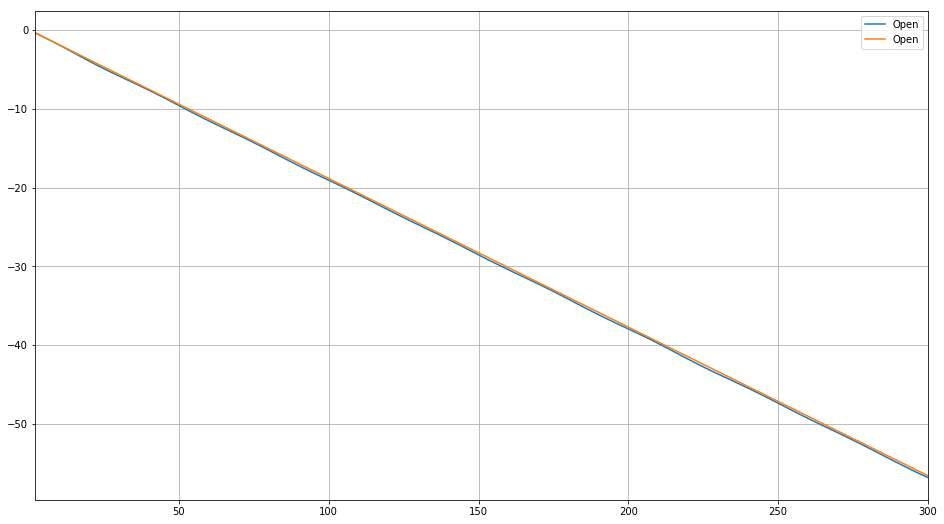

In [19]:
# plt.figure(1, figsize=(16,9))
# # plt.plot(freq, np.abs(S11_c_load), label="Load")
# plt.plot(freq, np.abs(S11_c_open), label="Open")
# plt.plot(freq, np.abs(S11_c_short), label="Short")
# # plt.plot(freq, np.abs(S11_c_2p), label="2port")
# plt.plot(freq, np.abs(S21_c_2p), label="Cable loss")
# plt.plot(freq, Gamma_in, label="Simu")
# plt.legend(loc='best')
# plt.xlim([min(freq), max(freq)])
# plt.grid()

# plt.figure(2, figsize=(16,9))
# plt.plot(freq, np.abs(S11_c_load), label="Load")
# plt.plot(freq, np.abs(ops), label="O+S")
# plt.plot(freq, np.abs(oms), label="O-S")
# plt.plot(freq, np.abs(S21_c_2p)**2, label="Loss^2")
# plt.legend(loc='best')
# plt.xlim([min(freq), max(freq)])
# plt.grid()

plt.figure(2, figsize=(16,9))
# plt.plot(freq, np.abs(S11_c_load), label="Load")
plt.plot(freq, np.unwrap(np.angle(S11_c_open)), label="Open")
plt.plot(freq, -2*np.pi*freq*9/(300), label="Open")
# plt.plot(freq, np.abs(S11_c_short), label="Short")
# plt.plot(freq, np.abs(S11_c_2p), label="2port")
# plt.plot(freq, np.abs(S21_c_2p), label="Cable loss")
# plt.plot(freq, Gamma_in, label="Simu")
plt.legend(loc='best')
plt.xlim([min(freq), max(freq)])
plt.grid()